# Natural Language Processing (NLP)
* NLP is the the processing of a text collection
    * Text collection: a corpus (corpora for plural)
    * Examples
        * Your responses to my mid-semester check-in free response questions
        * Tweets
        * Facebook posts
        * Messaging conversations
        * The classics
        * Etc.
* NLP is notoriously difficulty because natural language lacks mathematical precision
* Thankfully, there are alot of really great Python libraries for NLP!!!
    * Let's see some of these in action with business reviews from the [Yelp API](https://www.yelp.com/developers/documentation/v3/authentication)
    
# NLP Demo w/Yelp API

In [7]:
api_key = "Enter API Here"

In [59]:
import requests
import json

# documentation at https://www.yelp.com/developers/documentation/v3/authentication
# api_key = "Enter API here"
headers = {"Authorization": "Bearer " + api_key}
    
def get_place_id(search_term):
    # documentation at https://www.yelp.com/developers/documentation/v3/business_search
    # api_key = "Enter API Here"
    url = "https://api.yelp.com/v3/businesses/search"
    url += "?term=" + search_term
    # GU GPS coords
    url += "&latitude=47.6670357"
    url += "&longitude=-117.403623"
    
    response = requests.get(url=url, headers=headers)
    json_object = json.loads(response.text)

    place_id = json_object["businesses"][0]["id"]
    print(search_term, "id:", place_id)
    
    return place_id
    
def get_reviews(search_term):
    # documentation at https://www.yelp.com/developers/documentation/v3/business_reviews
    # returns three reviews in yelp "default order"
    place_id = get_place_id(search_term)
    url = "https://api.yelp.com/v3/businesses/" + place_id + "/reviews"
    response = requests.get(url=url, headers=headers)
    json_object = json.loads(response.text)
    reviews_array = json_object["reviews"]
    reviews_text = []
    for review_object in reviews_array:
        reviews_text.append(review_object["text"])
    return reviews_text

reviews_dict = {"zips": get_reviews("zips"), "dinardis": get_reviews("dinardis")}

zips id: lfzj1Ez4NWzNpIeOr33odg
dinardis id: FYCMMNsbTU7Kzb2Dw_JqHw


In [60]:
for name, reviews in reviews_dict.items():
    print("***",name, "reviews", "***")
    for review in reviews:
        print("\t", review)
    print()

*** zips reviews ***
	 Zip's, you will always be a friend of mine. I was out with my stepbrother, when he said, "what do you want to eat? I'm buying?" 

Well, I've never been one...
	 I think this was my first time ever going g inside this Zips location, and it was great. Very friendly counter service and the inside was spotless. I got...
	 What the hell is a Zips?  Never seen one, here on business and had to try it. Burger. Just a burger.  It was good, old school "burger queen" style (that is...

*** dinardis reviews ***
	 Ok, so I had been hesitant to come here for a while because I generally avoid downtown/campus areas due to lack of parking and other things. Well, there's...
	 I came here on a week day, when I got here it was relatively slow only about 5 other people in the restaurant. The menu is filled with great sounding...
	 Ciro puts up with me, because we grew up within a 30-mile radius of each other, haha.  He also knows I refrain from 5-star (or 1-star) reviews, and he's...

## Task 1
Compute the average polarity of the reviews using `textblob` module. Does this seem in line with the average rating for each business?

In [61]:
from textblob import TextBlob

def compute_average_polarity(reviews):
    polarities = []
    for review in reviews:
        blob = TextBlob(review)
        for sentence in blob.sentences:
            polarities.append(sentence.sentiment.polarity)
    return sum(polarities) / len(polarities)

for name, reviews in reviews_dict.items():
    polarity = compute_average_polarity(reviews)
    print(name + "'s average polarity:", polarity)

zips's average polarity: 0.11770833333333335
dinardis's average polarity: 0.0951388888888889


## Task 2
Visualize the frequencies of words in both sets of business reviews with word clouds using `wordcloud` module. Do the most frequent words in each provide more context for your polarity result?

zips


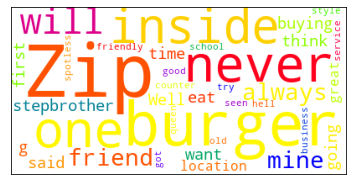

dinardis


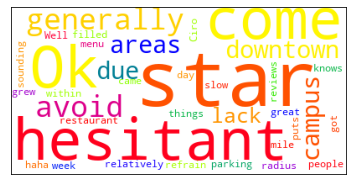

In [62]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def generate_wordcloud(text):
    wc = WordCloud(background_color="white",colormap="prism",random_state=0)
    plt.figure()
    plt.imshow(wc.generate(text))
    plt.xticks([],[])
    plt.yticks([],[])
    plt.show()

for name,reviews in reviews_dict.items():
    # preprocess the reviews into a single string
    reviews_str = " ".join(reviews)
    print(name)
    generate_wordcloud(reviews_str)

## Task 3
Compute readability scores for each set of reviews using `textatistic` module. Compare the Dale-Chall scores, which is a score that can be mapped to grade levels from 4 and below to college graduate (grade 16) and above. This score is considered to be most reliable for a broad range of text types.

What can these scores be used for? (with the small sample size we have we can't make any definitive conclusions...)

In [63]:
from textatistic import Textatistic

def compute_readability_scores(text):
    readability = Textatistic(text)
    for score,value in readability.dict().items():
        print(score, "->", value)

for name, reviews in reviews_dict.items():
    reviews_str = " ".join(reviews)
    print(name)
    compute_readability_scores(reviews_str)
    print()
    

zips
char_count -> 380
word_count -> 91
sent_count -> 18
sybl_count -> 102
notdalechall_count -> 13
polysyblword_count -> 1
flesch_score -> 106.87723748473749
fleschkincaid_score -> -0.39195970695970495
gunningfog_score -> 2.461782661782662
smog_score -> 4.475607210031446
dalechall_score -> 6.14296984126984

dinardis
char_count -> 379
word_count -> 90
sent_count -> 12
sybl_count -> 109
notdalechall_count -> 15
polysyblword_count -> 4
flesch_score -> 96.76250000000002
fleschkincaid_score -> 1.6261111111111113
gunningfog_score -> 4.777777777777778
smog_score -> 6.42735559955562
dalechall_score -> 6.640166666666666



## Task 4
Perform named entity recognition using `spaCy`. What dates, times, quantities, places, people, things, organizations, do people mention in their reviews of these businesses?

In [64]:
# recognizes nouns and the types of nouns
import spacy
nlp = spacy.load("en_core_web_sm")


for name, reviews in reviews_dict.items():
    print(name)
    reviews_str = " ".join(reviews)
    document = nlp(reviews_str)
    for entity in document.ents:
        print(entity.text, "->", entity.label_)
    print()

zips
Zip -> PERSON
first -> ORDINAL
Zips -> PERSON

dinardis
a week day -> DATE
only about 5 -> CARDINAL
30-mile -> QUANTITY
5 -> CARDINAL



## Task 5
Calculate document similarity using `spaCy` to determine how alike the review sets are in terms of word frequencies, writing styles, etc. Do you hypothesize there are other businesses (but still in this category) that would have reviews that are more or less similar to these? Test your theories out with the API and `spaCy` :)

In [65]:
document1 = nlp(" ".join(reviews_dict["zips"]))
document2 = nlp(" ".join(reviews_dict["dinardis"]))
print(document1.similarity(document2))
# take a look at the notes for today to see how to remove the warning below

0.7452250169612324


C:\Users\benpu\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  This is separate from the ipykernel package so we can avoid doing imports until
